In [1]:
#Take a random 200,000 row sample from data using gshuf -n 200000 auth.txt > auth_sample in the command line
#Import dependecies
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in
auth_data = pd.read_csv("auth_sample")

In [3]:
auth_data.head()

,729834,U9916@DOM1,U9916@DOM1.1,C20906,C457,?,?.1,TGS,Success
0,2230093,C599$@DOM1,C599$@DOM1,C1065,C1065,?,Network,LogOff,Success
1,3919649,U9008@DOM1,U9008@DOM1,C19145,C8799,?,?,TGS,Success
2,2941099,U6161@DOM1,U6161@DOM1,C14074,C2106,Kerberos,Network,LogOn,Success
3,628166,U5276@DOM1,C217$@DOM1,C217,C217,?,?,AuthMap,Success
4,2442601,U53@DOM1,U53@DOM1,C3037,C3037,?,?,TGT,Success


In [4]:
#rename column headers

auth_data = auth_data.rename(columns={'?': 'authentication_type', '?.1': 'logon_type', '729834': 'time', 'U9916@DOM1': 'source_user@domain', 'U9916@DOM1.1': 'destination_user@domain', 'C20906': 'source_computer', 'C457': 'destination_computer', 'TGS': 'authentication_orientation', 'Success': 'success_failure'})
auth_data.head()

,time,source_user@domain,destination_user@domain,source_computer,destination_computer,authentication_type,logon_type,authentication_orientation,success_failure
0,2230093,C599$@DOM1,C599$@DOM1,C1065,C1065,?,Network,LogOff,Success
1,3919649,U9008@DOM1,U9008@DOM1,C19145,C8799,?,?,TGS,Success
2,2941099,U6161@DOM1,U6161@DOM1,C14074,C2106,Kerberos,Network,LogOn,Success
3,628166,U5276@DOM1,C217$@DOM1,C217,C217,?,?,AuthMap,Success
4,2442601,U53@DOM1,U53@DOM1,C3037,C3037,?,?,TGT,Success


In [5]:
#drop rows that contain ?
data = auth_data[auth_data.authentication_type != '?']
df = data[data.logon_type != '?']
df.head()

,time,source_user@domain,destination_user@domain,source_computer,destination_computer,authentication_type,logon_type,authentication_orientation,success_failure
2,2941099,U6161@DOM1,U6161@DOM1,C14074,C2106,Kerberos,Network,LogOn,Success
6,3031521,C2043$@DOM1,C2043$@DOM1,C2043,C586,Kerberos,Network,LogOn,Success
7,1345913,C12371$@DOM1,C12371$@DOM1,C12371,C586,Kerberos,Network,LogOn,Success
9,4623535,U7694@DOM1,U7694@DOM1,C16770,C585,Kerberos,Network,LogOn,Success
17,4710726,C5275$@DOM1,C5275$@DOM1,C5276,C2106,Kerberos,Network,LogOn,Success


In [6]:
#drop columns that may not be useful
columns = ['source_user@domain', 'destination_user@domain', 'source_computer', 'destination_computer' ]
df.drop(columns, inplace=True, axis=1)

In [7]:
df.head()

,time,authentication_type,logon_type,authentication_orientation,success_failure
2,2941099,Kerberos,Network,LogOn,Success
6,3031521,Kerberos,Network,LogOn,Success
7,1345913,Kerberos,Network,LogOn,Success
9,4623535,Kerberos,Network,LogOn,Success
17,4710726,Kerberos,Network,LogOn,Success


In [8]:
print(df.dtypes)

time                           int64
authentication_type           object
logon_type                    object
authentication_orientation    object
success_failure               object
dtype: object


In [9]:
#convert non-numerical data to numeric
df.convert_objects(convert_numeric=True)

def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

df = handle_non_numerical_data(df)
print(df.head)


<bound method NDFrame.head of            time  authentication_type  logon_type  authentication_orientation  \
2       2941099                    6           0                           0   
6       3031521                    6           0                           0   
7       1345913                    6           0                           0   
9       4623535                    6           0                           0   
17      4710726                    6           0                           0   
22      4383143                    6           0                           0   
25      2340056                    4           2                           0   
29      4236670                    6           0                           0   
30      3507962                    6           0                           0   
31      3499147                    6           0                           0   
32      4041105                    6           0                           0   
33      46

In [10]:
df.head()

,time,authentication_type,logon_type,authentication_orientation,success_failure
2,2941099,6,0,0,1
6,3031521,6,0,0,1
7,1345913,6,0,0,1
9,4623535,6,0,0,1
17,4710726,6,0,0,1


In [11]:
#more dependencies for ML

from sklearn import preprocessing

In [35]:


target = df["success_failure"]
target_names = ["success", "failure"]





In [36]:
df2 = df.drop("success_failure", axis=1)
feature_names = df2.columns
df2.head()

,time,authentication_type,logon_type,authentication_orientation
2,2941099,6,0,0
6,3031521,6,0,0
7,1345913,6,0,0
9,4623535,6,0,0
17,4710726,6,0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, random_state=42)

In [38]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.992


In [40]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

    success       0.00      0.00      0.00       160
    failure       0.99      1.00      1.00     22120

avg / total       0.99      0.99      0.99     22280



In [41]:
df.head()

,time,authentication_type,logon_type,authentication_orientation,success_failure
2,2941099,6,0,0,1
6,3031521,6,0,0,1
7,1345913,6,0,0,1
9,4623535,6,0,0,1
17,4710726,6,0,0,1


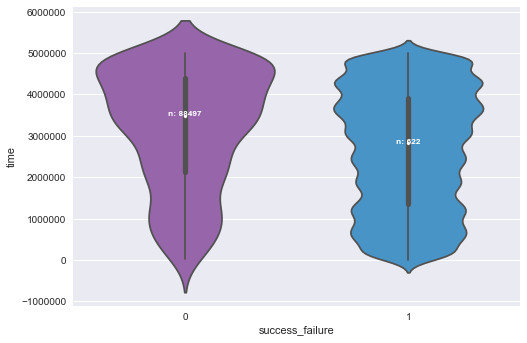

In [52]:
# Basic violinplot
# 0=failure  1=success
ax = sns.violinplot(x="success_failure", y="time", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['success_failure'])['time'].median().values
nobs = df['success_failure'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
sns.plt.show()
